## Importing necessary libraries and Data

In [1]:
# importing necessary libraries
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
# reading the data
df = pd.read_excel("Data.xlsx")

In [3]:
# reading the data into various dataframes
transaction = pd.read_excel("Data.xlsx",sheet_name = 0)
CustomerDemographic = pd.read_excel("Data.xlsx", sheet_name =1)
CustomerAddress = pd.read_excel("Data.xlsx", sheet_name = 2)

In [4]:
# merging the various dataframes
a = transaction.merge(CustomerAddress, how='inner', on = "customer_id")
data = CustomerDemographic.merge(a,how='inner', on = "customer_id")
data.isnull().sum()

customer_id                               0
first_name                                0
last_name                               638
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     438
job_title                              2350
job_industry_category                     0
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
Age                                     438
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                      

In [5]:
# copying the data dataframe in another dataframe
DataFrame = data.copy()

In [6]:
# checking the data columns
data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [7]:
# checking the data dataframe
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,235.63,125.07,38482,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,1577.53,826.51,39526,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,low,small,1720.70,1531.42,37823,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,360.40,270.30,37873,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,medium,71.49,53.62,38573,060 Morning Avenue,2016,New South Wales,Australia,10


### Creating a new Column Profit(which will be our target column for later models)

In [8]:
data['profit'] = data['list_price'] - data['standard_cost']

### Dropping Unnecessary columns

In [9]:
data.drop(['transaction_id','country','address','order_status','transaction_date','deceased_indicator','job_title','DOB','first_name','last_name','list_price','standard_cost'],inplace = True,axis = 1)

#### Checking the unique, no of unique values and values_counts for the respected columns 

In [10]:
# creating list for suspected categorical columns
list = ['gender',
        'job_industry_category', 'wealth_segment', 'owns_car',
         'online_order', 'brand', 'product_line', 'product_class',
        'product_size', 'product_first_sold_date', 'postcode', 'state',
        'property_valuation', 'profit']

In [11]:
# checking the unique values
for i in list:
    print("________________"+i+"_____________")
    print(data[i].unique())

________________gender_____________
['Female' 'Male' 'Unspecified']
________________job_industry_category_____________
['Health' 'Financial Services' 'IT' 'Retail' 'Agriculture' 'Property'
 'Manufacturing' 'Telecommunications' 'Entertainment']
________________wealth_segment_____________
['Mass Customer' 'High Net Worth' 'Affluent Customer']
________________owns_car_____________
['Yes' 'No']
________________online_order_____________
[0 1]
________________brand_____________
['OHM Cycles' 'Solex' 'Trek Bicycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']
________________product_line_____________
['Standard' 'Road' 'Mountain' 'Touring']
________________product_class_____________
['medium' 'low' 'high']
________________product_size_____________
['medium' 'small' 'large']
________________product_first_sold_date_____________
[38482 39526 37823 37873 38573 33552 33455 37337 40618 37838 35378 40784
 38206 37874 34143 33364 36361 40410 41848 42226 38258 37499 42404 42172
 36367 40336 41922 4

In [12]:
# Checking the no of unique values and value counts for the above columns
for i in list:
    print("________________"+i+"_____________")
    print(data[i].nunique())
    print(data[i].value_counts())

________________gender_____________
3
Female         9900
Male           9419
Unspecified     446
Name: gender, dtype: int64
________________job_industry_category_____________
9
Manufacturing         5369
Financial Services    5264
Health                3436
Retail                1746
Property              1278
IT                    1060
Entertainment          694
Agriculture            566
Telecommunications     352
Name: job_industry_category, dtype: int64
________________wealth_segment_____________
3
Mass Customer        9923
High Net Worth       5040
Affluent Customer    4802
Name: wealth_segment, dtype: int64
________________owns_car_____________
2
Yes    9942
No     9823
Name: owns_car, dtype: int64
________________online_order_____________
2
1    10082
0     9683
Name: online_order, dtype: int64
________________brand_____________
6
Solex             4246
Giant Bicycles    3308
WeareA2B          3288
OHM Cycles        3037
Trek Bicycles     2982
Norco Bicycles    2904
Name: brand

### Encoding for Categorical Variables 

In [13]:
# label Encoding and One hot encoding list of variables
label_encoding= ['wealth_segment','brand','job_industry_category','product_line']
hot_encoding =['owns_car','product_class','product_size','state','gender']

In [14]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


In [15]:
# label Encoding for categorical variables who have more than 2 unique variables
for i in label_encoding:
    # Encode labels in column 'species'.
    data[i]= label_encoder.fit_transform(data[i])

Instead of using map function for a categorical column, we used label encoder for the ease of coding.

In [16]:
#hot Encoding for categorical variable who have binary values
for j in hot_encoding:
    data = pd.get_dummies(data,columns = [j],drop_first=True)

### Checking the null values

In [17]:
# Lets check null value
list_b = ['customer_id', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'tenure', 'Age',
       'product_id', 'online_order', 'brand', 'product_line',
       'product_first_sold_date', 'postcode', 'property_valuation', 'profit',
       'owns_car_Yes', 'product_class_low', 'product_class_medium',
       'product_size_medium', 'product_size_small', 'state_Queensland',
       'state_Victoria', 'gender_Male', 'gender_Unspecified']
for k in list_b:
    print("________"+k+"_________")
    print(data[k].isnull().sum())

________customer_id_________
0
________past_3_years_bike_related_purchases_________
0
________job_industry_category_________
0
________wealth_segment_________
0
________tenure_________
0
________Age_________
438
________product_id_________
0
________online_order_________
0
________brand_________
0
________product_line_________
0
________product_first_sold_date_________
0
________postcode_________
0
________property_valuation_________
0
________profit_________
0
________owns_car_Yes_________
0
________product_class_low_________
0
________product_class_medium_________
0
________product_size_medium_________
0
________product_size_small_________
0
________state_Queensland_________
0
________state_Victoria_________
0
________gender_Male_________
0
________gender_Unspecified_________
0


In [18]:
# finding the age median value 
media_data = data['Age'].median()

In [19]:
# Lets fill the missing value
data['Age'].fillna(media_data,inplace = True)

In [20]:
# checking the null values of Age column
data['Age'].isnull().sum()

0

### Checking the correlationship between the variables

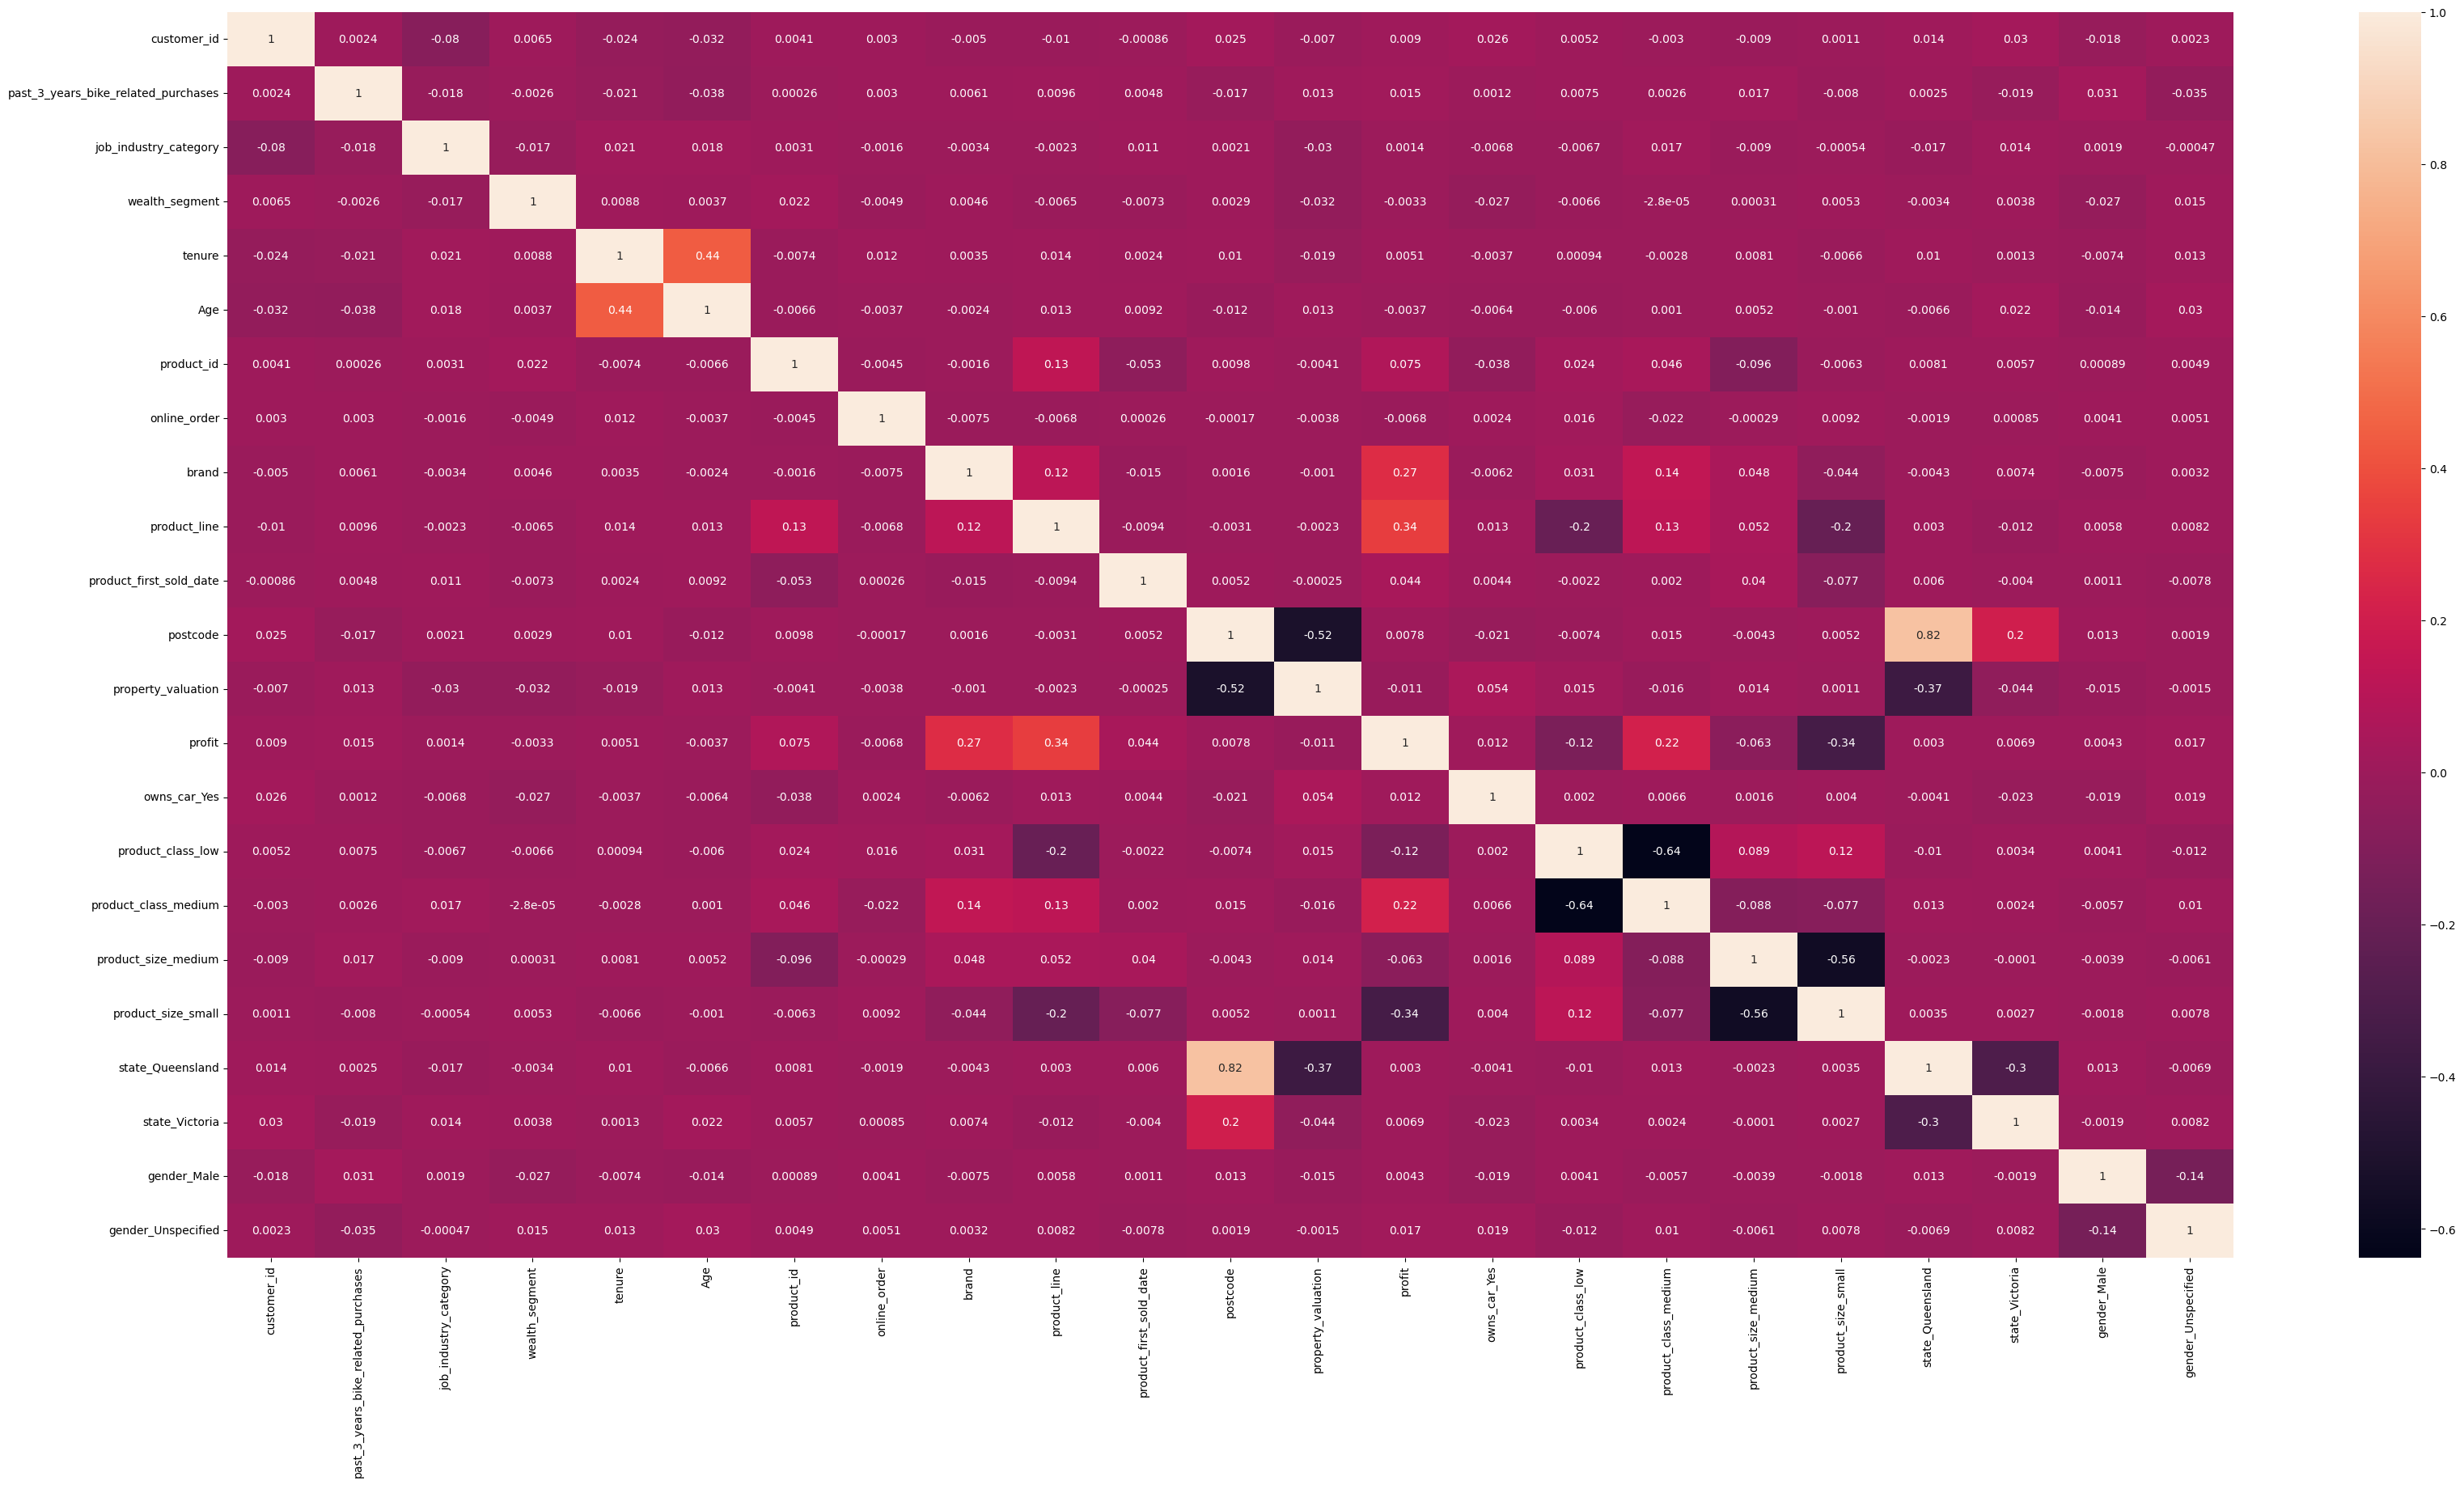

In [21]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Categorising Profit Column 

In [22]:
data['profit'].mean()

551.7849850746201

In [23]:
print("max ",data['profit'].max())
print("min ",data['profit'].min())

max  1702.5499999999997
min  4.8


In [24]:
data['profit'] = data['profit'].apply(lambda x : 0 if x < 552 else 1 )

In [25]:
data['profit'].value_counts()

0    11897
1     7868
Name: profit, dtype: int64

In [26]:
data.head()

,customer_id,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,tenure,Age,product_id,online_order,brand,product_line,...,profit,owns_car_Yes,product_class_low,product_class_medium,product_size_medium,product_size_small,state_Queensland,state_Victoria,gender_Male,gender_Unspecified
0,1,93,3,2,11,64.0,86,0,2,2,...,0,1,0,1,1,0,0,0,0,0
1,1,93,3,2,11,64.0,38,1,3,2,...,1,1,0,1,1,0,0,0,0,0
2,1,93,3,2,11,64.0,47,1,4,1,...,0,1,1,0,0,1,0,0,0,0
3,1,93,3,2,11,64.0,72,0,1,2,...,0,1,0,1,1,0,0,0,0,0
4,1,93,3,2,11,64.0,2,0,3,2,...,0,1,0,1,1,0,0,0,0,0


### Splitting the data into Target Variable and predictor variables 

In [27]:
X= data.drop(['profit'],axis =1)
y = data['profit']

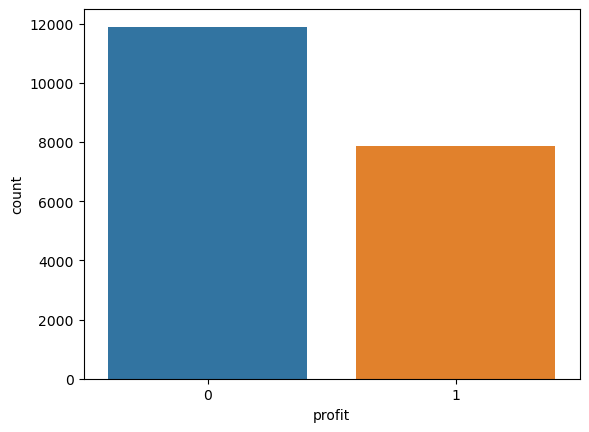

In [28]:
# Examining if the data is balanced or not
sns.countplot(x=y)
plt.show()

### Balancing the data

In [29]:
from imblearn.over_sampling import SMOTE
Smote = SMOTE()
X_balanced,y_balanced = Smote.fit_resample(X,y)

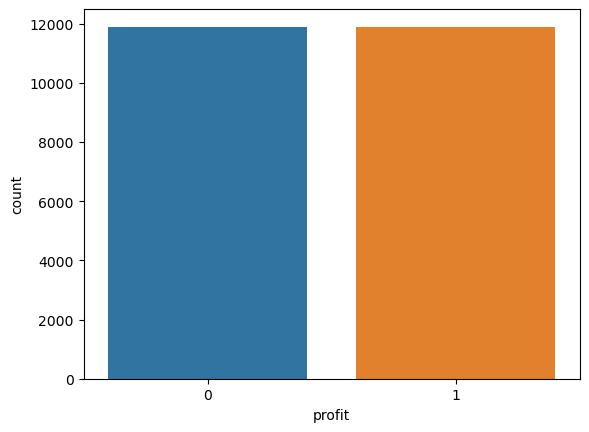

In [30]:
# Eaxming Balancing if the data
sns.countplot(x=y_balanced)
plt.show()

### Splitting the data into Train and test

In [31]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42)

In [32]:
X_train.shape

(19035, 22)

In [33]:
X_test.shape

(4759, 22)

### Logistic Regression Model Building

In [34]:
# importing logistic regression and RFE  
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [35]:
estimate = LogisticRegression() # saving logistic regression into estimate

In [37]:
# selecting the features by RFE 
selector = RFE(estimate,n_features_to_select= 18) # selection of 20 features is purely arbitrarily
selector.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=18)

In [38]:
# features selected by RFE 
col = X_train.columns[selector.support_]

In [39]:
len(col)

18

In [40]:
# saving these columns in X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

In [41]:
# adding constant with X_train and X_test 
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train,has_constant='add')
X_test_sm = sm.add_constant(X_test,has_constant='add')

In [42]:
# fitting the model
model = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                19035
Model:                            GLM   Df Residuals:                    19016
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9091.8
Date:                Thu, 07 Sep 2023   Deviance:                       18184.
Time:                        16:29:31   Pearson chi2:                 1.65e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3502
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

#### Dropping the columns whose pvalues greater than 0.05 as significance level is assumed to be 0.05.

In [43]:
# dropping product_size_small variable as pvalue is higher than 0.05
X_train_sm.drop(['product_size_small'],axis = 1,inplace = True)
X_test_sm.drop(['product_size_small'],axis = 1, inplace = True)
model2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res2 = model2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                19035
Model:                            GLM   Df Residuals:                    19017
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11463.
Date:                Thu, 07 Sep 2023   Deviance:                       22927.
Time:                        16:29:40   Pearson chi2:                 1.90e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1663
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [44]:
# now dropping the postcode
X_train_sm.drop(['postcode'],axis = 1,inplace = True)
X_test_sm.drop(['postcode'],axis = 1, inplace = True)
model3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res3 = model3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                19035
Model:                            GLM   Df Residuals:                    19018
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11463.
Date:                Thu, 07 Sep 2023   Deviance:                       22927.
Time:                        16:30:18   Pearson chi2:                 1.90e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1663
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [45]:
# now dropping tenure
X_train_sm.drop(['tenure'],axis = 1,inplace = True)
X_test_sm.drop(['tenure'],axis = 1, inplace = True)
model9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res9 = model9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                19035
Model:                            GLM   Df Residuals:                    19019
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11463.
Date:                Thu, 07 Sep 2023   Deviance:                       22927.
Time:                        16:33:26   Pearson chi2:                 1.90e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1663
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [46]:
# now dropping state_Queensland
X_train_sm.drop(['state_Queensland'],axis = 1,inplace = True)
X_test_sm.drop(['state_Queensland'],axis = 1, inplace = True)
model9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res9 = model9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                19035
Model:                            GLM   Df Residuals:                    19020
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11463.
Date:                Thu, 07 Sep 2023   Deviance:                       22927.
Time:                        16:34:11   Pearson chi2:                 1.90e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1663
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [47]:
# dropping Age
X_train_sm.drop(['Age'],axis = 1,inplace = True)
X_test_sm.drop(['Age'],axis = 1, inplace = True)
model6 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res6 = model6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                19035
Model:                            GLM   Df Residuals:                    19021
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11464.
Date:                Thu, 07 Sep 2023   Deviance:                       22927.
Time:                        16:34:57   Pearson chi2:                 1.90e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1662
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [46]:
# # now dropping job_industry_category
# X_train_sm.drop(['job_industry_category'],axis = 1,inplace = True)
# X_test_sm.drop(['job_industry_category'],axis = 1, inplace = True)
# model7 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res7 = model7.fit()
# print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15797
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9147.6
Date:                Wed, 09 Aug 2023   Deviance:                       18295.
Time:                        00:56:23   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1702
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [47]:
# # now dropping postcode
# X_train_sm.drop(['postcode'],axis = 1,inplace = True)
# X_test_sm.drop(['postcode'],axis = 1, inplace = True)
# model8 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res8 = model8.fit()
# print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15798
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9148.2
Date:                Wed, 09 Aug 2023   Deviance:                       18296.
Time:                        00:56:48   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1702
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [48]:
# # now dropping state_Victoria 
# X_train_sm.drop(['state_Victoria'],axis = 1,inplace = True)
# X_test_sm.drop(['state_Victoria'],axis = 1, inplace = True)
# model9 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res9 = model9.fit()
# print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15799
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9148.3
Date:                Wed, 09 Aug 2023   Deviance:                       18297.
Time:                        00:57:20   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1701
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [49]:
# # now dropping state_Queensland
# X_train_sm.drop(['state_Queensland'],axis = 1,inplace = True)
# X_test_sm.drop(['state_Queensland'],axis = 1, inplace = True)
# model10 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res10 = model10.fit()
# print(res10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15800
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9148.5
Date:                Wed, 09 Aug 2023   Deviance:                       18297.
Time:                        00:57:39   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1701
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [50]:
# # dropping of tenure column
# X_train_sm.drop(['tenure'],axis = 1,inplace = True)
# X_test_sm.drop(['tenure'],axis = 1, inplace = True)
# model11 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res11 = model11.fit()
# print(res11.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15801
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9149.3
Date:                Wed, 09 Aug 2023   Deviance:                       18299.
Time:                        00:57:56   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1700
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [51]:
# # dropping of Age variable
# X_train_sm.drop(['Age'],axis = 1,inplace = True)
# X_test_sm.drop(['Age'],axis = 1, inplace = True)
# model12 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res12 = model12.fit()
# print(res12.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15802
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9150.0
Date:                Wed, 09 Aug 2023   Deviance:                       18300.
Time:                        00:58:14   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1700
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [52]:
# # droppping gender_Unspecified
# X_train_sm.drop(['gender_Unspecified'],axis = 1,inplace = True)
# X_test_sm.drop(['gender_Unspecified'],axis = 1, inplace = True)
# model13 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# res13 = model13.fit()
# print(res13.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 profit   No. Observations:                15812
Model:                            GLM   Df Residuals:                    15803
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9151.5
Date:                Wed, 09 Aug 2023   Deviance:                       18303.
Time:                        00:58:40   Pearson chi2:                 1.53e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1698
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Calculating the VIF for the rest of columns

In [50]:
# Calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF', ascending = False)

,Feature,VIF
0,const,39.259709
10,product_class_low,1.638173
11,product_class_medium,1.614003
7,product_line,1.086109
6,brand,1.063084
4,product_id,1.043234
12,product_size_medium,1.037258
9,owns_car_Yes,1.008717
8,property_valuation,1.006377
5,online_order,1.005884


### Predicting and Evaluating

In [51]:
# Creating Data Frame Train
train_pred=res6.predict(X_train_sm)
train=pd.DataFrame(train_pred,columns=["predicted_probs"])
train["actual"]=y_train
train["predicted"]=np.where(train["predicted_probs"]>0.5,1,0)# by default 0.5

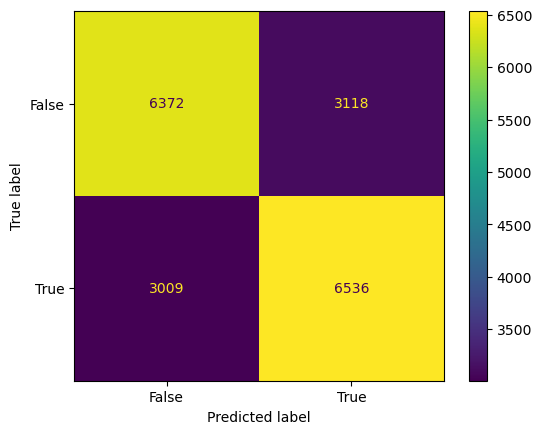

In [52]:
# Creating Confusion Matrix
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(train["actual"],train["predicted"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
cm_display.plot()
plt.show()

In [53]:
# Printing the train accuracy, recall and precision
print("Train Accuracy:",round(metrics.accuracy_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Recall:",round(metrics.recall_score(train["actual"],train["predicted"])*100,2),"%")
print("Train Precision:",round(metrics.precision_score(train["actual"],train["predicted"])*100,2),"%")

Train Accuracy: 67.81 %
Train Recall: 68.48 %
Train Precision: 67.7 %


In [54]:
# Creating Data Frame Test
test_pred=res6.predict(X_test_sm)
test=pd.DataFrame(test_pred,columns=["predicted_probs"])
test["actual"]=y_test
test["predicted"]=np.where(test["predicted_probs"]>0.5,1,0)# by default 0.5

In [55]:
# Printing the test accuracy, recall and precision
print("Test Accuracy:",round(metrics.accuracy_score(test["actual"],test["predicted"])*100,2),"%")
print("Test Recall:",round(metrics.recall_score(test["actual"],test["predicted"])*100,2),"%")
print("Test Precision:",round(metrics.precision_score(test["actual"],test["predicted"])*100,2),"%")

Test Accuracy: 67.05 %
Test Recall: 67.47 %
Test Precision: 66.4 %


In [56]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,test_pred)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.7344467595929107
Auc_score =  0.7344467595929107


Text(0.5, 0, 'False Positive Rate')

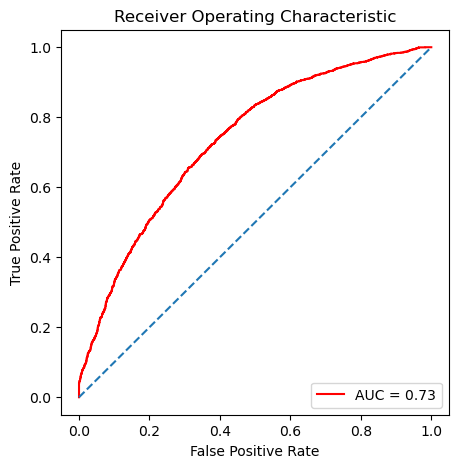

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

As the accuracy of the logistic regression for the train and test is quite good, hence the model is neither overfitted 
nor underfitted. 

## Decision-Tree Model Building

### Importing the Decision tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier # importing classifier

In [59]:
dtree = DecisionTreeClassifier() # storing the DecisionTreeClassifier as dtree

In [60]:
# importing necessary libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

In [61]:
# defining parameters for decision tree
parametre = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(0,10),
    'min_samples_split': range(0,10),
    'min_samples_leaf': range(0,10)
}

In [64]:
# using  and defining the gridsearchcv
tree = GridSearchCV(dtree,parametre,cv= 5,scoring='accuracy',return_train_score=True, n_jobs = -1)
tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [65]:
tree.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'min_samples_split': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [67]:
tree_result = pd.DataFrame(tree.cv_results_)

In [83]:
tree_result.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015620,8.583069e-07,0.0,0.0,gini,0,0,0,"{'criterion': 'gini', 'max_depth': 0, 'min_sam...",NaN,...,NaN,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.015622,8.176054e-07,0.0,0.0,gini,0,0,1,"{'criterion': 'gini', 'max_depth': 0, 'min_sam...",NaN,...,NaN,NaN,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [70]:
tree.best_score_

0.9176779616495928

In [71]:
best_tree = tree.best_estimator_

In [72]:
best_tree

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5)

In [73]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5)

In [77]:
# predicting it on Test
y_pred_test = best_tree.predict(X_test)

In [78]:
# checking the accuracy for test dataset
metrics.accuracy_score(y_test,y_pred_test)

0.9119562933389368

In [79]:
# predicting it on train dataset
y_prob_train = best_tree.predict(X_train)

In [80]:
# checking the accuracy for train dataset
metrics.accuracy_score(y_train,y_prob_train)

0.9125295508274232

### Drawing Roc/Auc Curve

In [81]:
# checking with Roc/Auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,y_pred_test)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.9122141274457436
Auc_score =  0.9122141274457436


Text(0.5, 0, 'False Positive Rate')

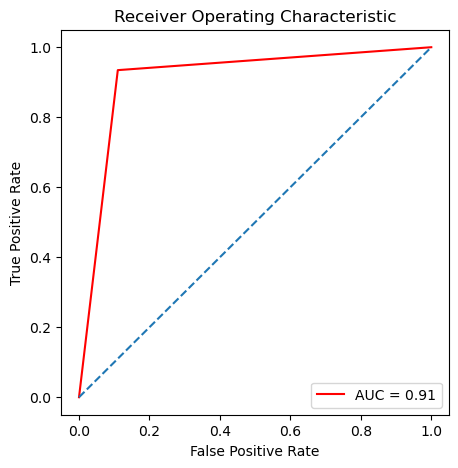

In [82]:
# plotting the curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Random Forest Model Building

### Importing RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier # importing

In [85]:
# fitting the model
Model_RFC = RandomForestClassifier(random_state=42)
Model_RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Training the data

In [86]:
# defining the parameters
parametre_ran={
      'n_estimators': range(0,10),
    'max_depth': range(0,5),
    'min_samples_split': range(0,5),
    'min_samples_leaf': range(0,5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [89]:
# using GridSearchCV to use defined parameters in training the models
grid_random = GridSearchCV(Model_RFC,parametre_ran,cv= 5,scoring='accuracy',return_train_score=True, n_jobs = -1)

In [90]:
# fitting the model with defined parameters
grid_random.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(0, 5),
                         'n_estimators': range(0, 10)},
             return_train_score=True, scoring='accuracy')

In [91]:
rf_result = pd.DataFrame(grid_random.cv_results_)

In [94]:
best_rf = grid_random.best_estimator_
best_rf

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=3,
                       n_estimators=9, random_state=42)

In [95]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=3,
                       n_estimators=9, random_state=42)

### Predicting And Evaluating

In [96]:
# predicting the test dataset
y_pred_random = best_rf.predict(X_test)

In [97]:
# evaluating model performance on test dataset
metrics.accuracy_score(y_test,y_pred_random)

0.8207606640050431

In [98]:
# predicting on train data
y_pred_random_t = grid_random.predict(X_train)

In [99]:
# evaluating model performance on train dataset
metrics.accuracy_score(y_train,y_pred_random_t)

0.821959548200683

### Drawing Roc/Auc curve

In [100]:
# checking the Roc/Auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_random)
roc_auc = auc(false_positive_rate, true_positive_rate)
auc_score = metrics.roc_auc_score(y_test,y_pred_random)
print("roc_auc =",roc_auc)
print("Auc_score = ",auc_score)

roc_auc = 0.8223130028912271
Auc_score =  0.8223130028912271


Text(0.5, 0, 'False Positive Rate')

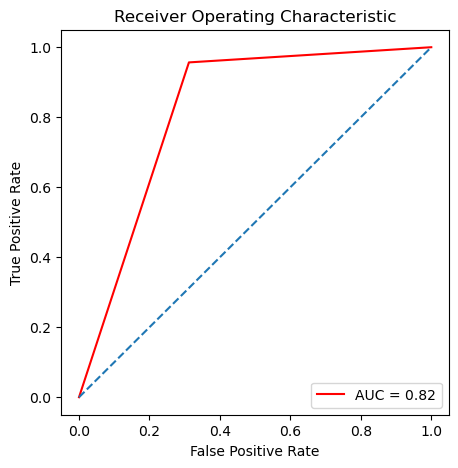

In [101]:
# plotting the Roc/Auc curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Reverse Engineering

In [ ]:
type(y_pred_test)

In [ ]:
test_data= pd.DataFrame(y_pred_test)

In [ ]:
train_data = pd.DataFrame(y_prob_train)
train_data

In [ ]:
combined = pd.concat([train_data,test_data]) # concating the train and test data

In [ ]:
combined = combined.reset_index(drop=True)

In [ ]:
DataFrame['Predicted'] = combined

In [ ]:
DataFrame.head()

In [ ]:
# predicting the segments where profit = 0 i.e. profit is low
profit_0 = DataFrame[DataFrame['Predicted'] == 0]['wealth_segment'].value_counts()

In [ ]:
# predicting the segments where profit = 1 i.e. profit is high
profit_1 = DataFrame[DataFrame['Predicted']== 1]['wealth_segment'].value_counts()

In [ ]:
# low profitable segments 
profit_0

In [ ]:
# high profitable segments 
profit_1

## taking our target data sheet New Customer and predicting the profitable segment for them

### Reading the file and going through the data

In [74]:
New_customer = pd.read_excel("Data.xlsx", sheet_name = 3)

In [92]:
New_customer.head()

,Unnamed: 0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,0,Chickie,Brister,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0
1,1,Morly,Genery,Male,69,1970-03-22,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0
2,2,Ardelis,Forrester,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0
3,3,Lucine,Stutt,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0
4,4,Melinda,Hadlee,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0


In [93]:
New_customer.drop(['Unnamed: 0'],axis = 1,inplace = True) # Dropping unnecessary columns

In [94]:
New_customer.head() # rechecking the data

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60.0
1,Morly,Genery,Male,69,1970-03-22,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47.0
2,Ardelis,Forrester,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43.0
3,Lucine,Stutt,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52.0


### Creating New Dataframe

In [96]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)

class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, state_mapping, label_encoding, hot_encoding):
        self.label_encoding = label_encoding
        self.hot_encoding = hot_encoding
        self.state_mapping = state_mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Replace values in 'state' column using the mapping dictionary
        X['state'] = X['state'].replace(self.state_mapping)
        
        # Label Encoding
        label_encoder = preprocessing.LabelEncoder()
        for column in self.label_encoding:
            X[column] = label_encoder.fit_transform(X[column])

        # Hot Encoding
        for column in self.hot_encoding:
            X = pd.get_dummies(X, columns=[column], drop_first=True)

        return X

def transform_pipeline(file_path):
    try:
        # Step 1: Data loading
        df = pd.read_excel(file_path)

        # Step 2: Replace values in 'state' column using the mapping dictionary
        state_mapping = {
            'QLD': 'Queensland',
            'VIC': 'Victoria',
            'NSW': 'New South Wales'
        }

        # Step 3: Dropping columns
        list_to_drop = ['Unnamed: 0', 'first_name', 'last_name', 'country', 'DOB', 'address', 'Rank', 'Value']
        drop_columns_transformer = ColumnDropper(columns_to_drop=list_to_drop)
        df = drop_columns_transformer.transform(df)


        

        # Step 4: Data transformation (with label encoding and state replacement)
        label_encoding = ['wealth_segment', 'state', 'job_industry_category']
        hot_encoding = ['owns_car', 'state', 'gender']
        data_transformer = DataTransformer(label_encoding=label_encoding, hot_encoding=hot_encoding, state_mapping=state_mapping)
        df = data_transformer.transform(df)

        return df

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Example usage:
if __name__ == "__main__":
    transformed_df = transform_pipeline('new_customer.xlsx')
    if transformed_df is not None:
        print("DataFrame after pipeline transformation:")
        print(transformed_df.head())


DataFrame after pipeline transformation:
   past_3_years_bike_related_purchases  job_industry_category  wealth_segment  \
0                                   86                      5               2   
1                                   69                      6               2   
2                                   10                      2               0   
3                                   64                      5               0   
4                                   34                      2               0   

   tenure  postcode  property_valuation   Age  owns_car_Yes  state_1  state_2  \
0      14      4500                   6  60.0             1        1        0   
1      16      2113                  11  47.0             0        0        0   
2      10      3505                   5  43.0             0        0        1   
3       5      4814                   1  38.0             1        1        0   
4      19      2093                   9  52.0             0        

### Reverse Engineering

In [99]:
type(y_pred_test)

numpy.ndarray

In [100]:
test_data= pd.DataFrame(y_pred_test)

In [101]:
train_data = pd.DataFrame(y_prob_train)

In [102]:
train_data

,0
0,0
1,1
2,1
3,1
4,0
...,...
15807,1
15808,1
15809,1
15810,0


In [103]:
combined = pd.concat([train_data,test_data]) # concating the train and test data

In [104]:
combined = combined.reset_index(drop=True)


In [108]:
DataFrame['Predicted'] = combined

In [109]:
DataFrame.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation,Predicted
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,235.63,125.07,38482,060 Morning Avenue,2016,New South Wales,Australia,10,0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,1577.53,826.51,39526,060 Morning Avenue,2016,New South Wales,Australia,10,1
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,small,1720.70,1531.42,37823,060 Morning Avenue,2016,New South Wales,Australia,10,1
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,360.40,270.30,37873,060 Morning Avenue,2016,New South Wales,Australia,10,1
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,medium,71.49,53.62,38573,060 Morning Avenue,2016,New South Wales,Australia,10,0


In [111]:
# predicting the segments where profit = 0 i.e. profit is low
profit_0 = DataFrame[DataFrame['Predicted'] == 0]['wealth_segment'].value_counts()

In [113]:
# predicting the segments where profit = 1 i.e. profit is high
profit_1 = DataFrame[DataFrame['Predicted']== 1]['wealth_segment'].value_counts()

In [114]:
# low profitable segments 
profit_0

Mass Customer        5422
High Net Worth       2818
Affluent Customer    2625
Name: wealth_segment, dtype: int64

In [115]:
# more profitable segments
profit_1

Mass Customer        4501
High Net Worth       2222
Affluent Customer    2177
Name: wealth_segment, dtype: int64